### 讀取大盤資料

In [2]:
from finlab.data import Data

data = Data()

twii = data.get("發行量加權股價指數")

twii = twii['台股指數']

twii.head()

date
2006-01-02 09:00:00    6548.34
2006-01-02 09:01:00    6457.61
2006-01-02 09:02:00    6452.82
2006-01-02 09:03:00    6452.39
2006-01-02 09:04:00    6451.61
Name: 台股指數, dtype: float64

### 整理加權指數 1分k

In [3]:

twii = twii[twii.index.second == 0]

### 畫的更美一點

<AxesSubplot:>

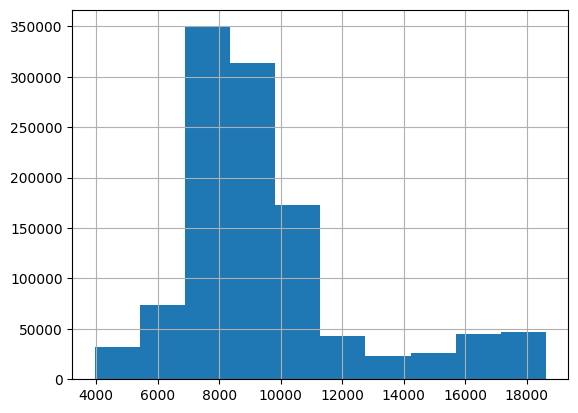

In [4]:
import matplotlib.pyplot as plt
plt.style.use
%matplotlib inline
twii.hist()

### DataFrame 小教室：groupby

In [5]:
import pandas as pd

s = pd.Series([1,2,3,4,5,6])
s.groupby([0,1,0,1,0,1]).prod()

0    15
1    48
dtype: int64

In [6]:
df = pd.DataFrame({'a':s, 'b':s})
df
df.groupby([1,2,1,2,1,2]).prod()

,a,b
1,15,15
2,48,48


In [7]:
twii.head()

date
2006-01-02 09:00:00    6548.34
2006-01-02 09:01:00    6457.61
2006-01-02 09:02:00    6452.82
2006-01-02 09:03:00    6452.39
2006-01-02 09:04:00    6451.61
Name: 台股指數, dtype: float64

### 每月漲跌

In [8]:
start_price = twii.groupby([twii.index.year, twii.index.month]).first()
last_price = twii.groupby([twii.index.year, twii.index.month]).last()
profit = (last_price/start_price)

# pandas <1.0.3
# profit.index.levels[0].name = 'year'
# profit.index.levels[1].name = 'month'

# pandas 1.0.3
profit.index=profit.index.set_names(['year','month'], level=[0,1])
profit = profit.reset_index()
profit = profit.pivot("year","month")#['台股指數']
profit
#profit

台股指數                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2006   0.997532  1.004508  1.007977  1.084337  0.954709  0.979182  0.962736   
2007   0.984141  1.026277  0.997779  0.998860  1.034224  1.090640  1.045484   
2008   0.884186  1.118550  1.018999  1.040516  0.966273  0.872894  0.933611   
2009   0.925238  1.072783  1.143443  1.150020  1.149831  0.933490  1.100363   
2010   0.933114  0.973255  1.065083  1.010630  0.921258  0.993950  1.058840   
2011   1.019264  0.940330  1.009727  1.037379  0.997887  0.962593  0.999028   
2012   1.062923  1.080398  0.976797  0.945635  0.973310  0.999285  0.996465   
2013   1.019549  1.006110  1.002612  1.022106  1.019909  0.976669  1.005672   
2014   0.982705  1.020917  1.024272  0.993464  1.032358  1.034945  0.991779   
2015   1.005872  1.027792  0.996294  1.024369  0.987884  0.961030  0.929456   
2016   0.976871  1.032651  1.039670  0.958040  1.018822  1.015346  1.036673   
2017   1.021014  1.032020  1.006261  1.006164  1.017091  1.035291  1.003103   
2018   1.043309  0.974034  1.009618  0.976042  1.020368  0.996501  1.020356   
2019   1.021059  1.046003  1.024244  1.030701  0.957216  1.022131  1.008665   
2020   0.958153  0.982346  0.859716  1.132269  0.995453  1.062061  1.089798   
2021   1.027543  1.053869  1.029920  1.069108  0.971638  1.040252  0.971386   
2022   0.970117  0.998743  1.002339  0.937757  1.012993  0.882076  1.011759   

                                                         
month        8         9         10        11        12  
year                                                     
2006   1.024353  1.041030  1.020088  1.077820  1.033828  
2007   0.967150  1.055038  1.024782  0.884159  0.990669  
2008   1.003139  0.811693  0.851621  0.915788  1.029308  
2009   0.964429  1.100092  0.977482  1.032987  1.079911  
2010   0.981400  1.081602  1.005986  1.010304  1.071666  
2011   0.895557  0.933348  1.050144  0.909911  1.024328  
2012   1.017409  1.043004  0.928827  1.057789  1.015742  
2013   0.989387  1.018946  1.033789  0.994884  1.024347  
2014   1.012926  0.950261  1.000874  1.023665  1.013074  
2015   0.943404  1.000773  1.045601  0.972680  1.002097  
2016   1.009399  1.010806  1.013447  0.994681  1.001384  
2017   1.015196  0.980933  1.039471  0.978380  1.007805  
2018   1.000582  0.994794  0.890589  1.008763  0.983756  
2019   0.980990  1.019931  1.048850  1.011521  1.044177  
2020   0.994208  0.993977  1.002455  1.093776  1.073573  
2021   1.014082  0.968238  1.003108  1.025922  1.045392  
2022   1.006358  0.889314  0.964630       NaN       NaN

### 每月漲跌色溫圖

D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.draw()
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.draw()
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.draw()
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:xlabel='None-month', ylabel='year'>

D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  func(*args, **kwargs)
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  func(*args, **kwargs)
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  func(*args, **kwargs)
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  func(*args, **kwargs)
D:\ProgramData\Miniconda3\envs\finlab\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramData\Mi

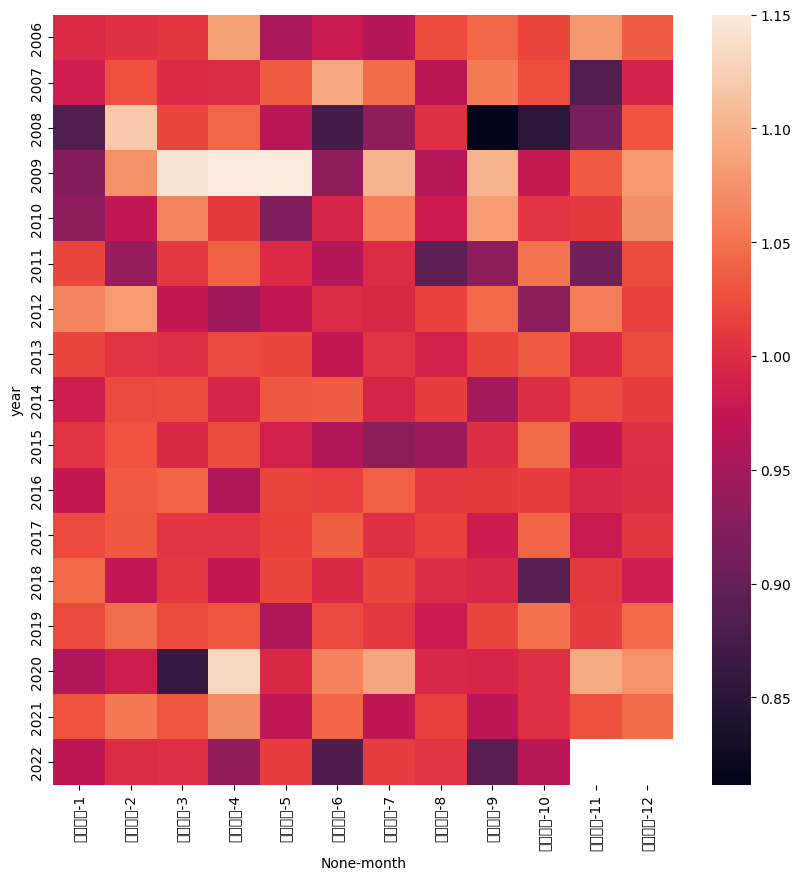

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(profit)

### 均線分析

In [10]:
# 每日開盤價
twii_daily = twii.groupby(twii.index.date).last()
twii_daily.index = pd.to_datetime(twii_daily.index)

# 60日平均
twii_average = twii_daily.rolling(60).mean()

# 乖離率
twii_bias = twii_daily / twii_average

# 後60日漲跌
twii_profit = twii_daily.shift(-60) / twii_daily

# 將資料合併（方便之後做圖）
df = pd.DataFrame({
    'price': twii_daily,
    'sma': twii_average,
    'bias': twii_bias,
    'profit': twii_profit,
    'year': twii_daily.index.year,
})

# 刪除NaN
df = df.dropna(how='any')
df.head()

,price,sma,bias,profit,year
2006-04-04,6665.60,6570.783000,1.014430,1.005822,2006
2006-04-06,6760.82,6575.762333,1.028142,0.993740,2006
2006-04-07,6781.94,6578.931833,1.030857,0.993006,2006
2006-04-10,6780.64,6581.668500,1.030231,0.982202,2006
2006-04-11,6757.17,6582.456833,1.026542,0.985482,2006


### 乖離率做圖

<AxesSubplot:xlabel='bias', ylabel='profit'>

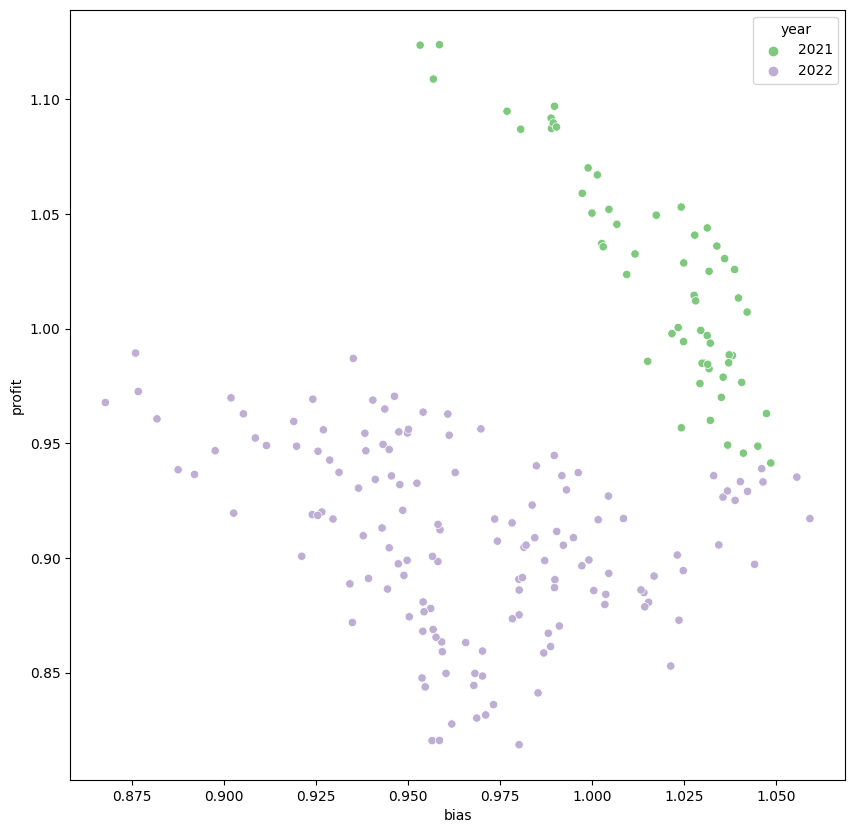

In [11]:
sns.scatterplot(x="bias", y="profit", data=df.tail(200), hue="year", palette="Accent", legend="full")

### 查看當前的乖離率

In [12]:
twii_bias.tail()

2022-10-25    0.883992
2022-10-26    0.890718
2022-10-27    0.906450
2022-10-28    0.898866
2022-10-31    0.912078
Name: 台股指數, dtype: float64